<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793672/blob/main/DataAnalysisPythonIBM_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATA ANALYSIS WITH PYTHON (IBM)**
---
#**Modulo 2 - Manipulación de Datos**
---
##**Alumno: Freddy Armendariz Herrera**
##**Matrícula: A01793672**
---

---
##**Preprocesamiento de los Datos en Python**

El preprocesamiento de datos es necesario es un paso necesario para el análisis de datos. Se refiere al proceso de mapear los datos desde su forma inicial hasta a un formato diferente, con el objetivo de preparar los datos para un análisis más extenso.

También es llamado limpieza de datos (*data cleaning*) o manipulación de datos (*data wrangling*).

**Objetivos de Aprendizaje**
* Identificación y manejo de datos vacíos.
* Formato de datos.
* Normalización de datos (centrado y escalamiento).
* Agrupación de datos.
* Conversión de valores categóricos en variables numéricas.

In [98]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(url, header = None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base","length","width","height","curb-weight",
           "engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio",
           "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers #Reemplaza el encabezado por defecto.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


---
##**Lidiar con Datos Faltantes**

Cuando no se guarda un valor en alguna de las características se dice que esa característica tiene un valor faltante. Estos valores pueden ser representados por:
* ?
* N/A
* 0
* Celda vacía

**Acciones recomendadas ante la Falta de Datos**

**Remover**

* Verificar si la fuente de donde provienen los datos puede recuperar los faltantes.

* Remover los registros o columnas en donde hagan falta campos.

Cuando se opta por eliminar los datos, se puede eliminar la columna completa o solo el registro en donde haga falta ese dato.

Si los datos faltantes son muy pocos, lo mas recomendable es eliminar solo el registro.

Al eliminar datos se busca crear el menor impacto posible.

**Reemplazar**

**Reemplazar** un dato es mejor que eliminarlo.

* Reemplazar los datos faltantes por el promedio de la columna (variables numéricas)
* Reemplazar los datos faltantes por la moda de la columna (variables categóricas)
* Reemplazar el dato basándose en otros atributos.

**Mantener los datos faltantes**

**¿Cómo eliminar datos en Python?**

Haciendo uso de la función *dropna()*.

In [99]:
df.dropna(              #Selecciona filas o columnas con valores faltantes para eliminarlos.
    subset=["price"],   #Columna donde se verifican datos faltantes.
    axis=0,             #0 para registros y 1 para columnas.
    inplace=True        #La modificación se realiza directamente en el dataset.
)

**¿Cómo reemplazar datos faltantes en Python?**

Haciendo uso de la función *replace()*.

In [100]:
import numpy as np

df.replace('?',np.NaN,inplace=True) #Reemplaza los ? por NaN
df["normalized-losses"]=df["normalized-losses"].astype(float) #Cambia el tipo de dato de la columna seleccionada
mean=df["normalized-losses"].mean() #Calcula el promedio de la columna

df["normalized-losses"].replace(  #Seleeciona la columna normalized-losses para reemplazar datos
    np.nan,                       #Un valor NaN
    mean,                         #Por el promedio de dicha columna
    inplace=True                  #Directamente sobre el dataset
)

---
##**Formato de Datos en Python**

Los datos son usualmente recolectados de diferentes fuentes en donde se le da diferente formato a los datos.

Estandarizar el formato de los datos simplifica el hacer una buena comparación entre estos.

Los datos sin formato son:
* Confusos.
* Dificiles de agregar.
* Difíciles de comparar.

Con formato:

* Más claros.
* Fáciles de agregar.
* Fáciles de comparar.

Hablando de nuestro conjunto de dato, hay una columna llamada *city-mpg* que hace referencia al consumo de combustible en millas por galón, es mejor manejar unidades métricas L/100km, por lo que se requiere convertir los valores de esta columna.

In [101]:
df["city-mpg"]=235/df["city-mpg"] #Se realiza la división para convertir millas por galón a L/100km.

In [102]:
df.rename(columns={"city-mpg":"city-L/100km"},inplace=True) #Se sustituye el nombre de la columna.

Por alguna razón, al importar el conjunto de datos, los tipos de datos de las columnas pueden estar mal establecidos.

Por ejemplo:

In [103]:
df["price"].tail()

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object

Como podemos ver, la columna de precio está identificada con el tipo de dato objeto, que pueden ser letras o palabras.

Hay muchos tipos de datos en Pandas:
* Objects: letras o palabras.
* Int64: Números enteros.
* Float64: Números con punto decimal.

**Corregir el tipo de dato**

Para identificar el tipo de dato:

In [104]:
df["price"].dtypes

dtype('O')

Para convertir el tipo de dato:

In [105]:
df["price"]=df["price"].astype(float) #Se convierte la columna price a flotante

In [106]:
df["price"].dtypes

dtype('float64')

---
##**Normalización de Datos en Python**

Esta es una técnica importante en el preprocesamiento de los datos.

En el conjunto de datos de autos usados, se puede apreciar como la columna *length* tiene diferente rango de valores comparándolo con la columna *width* y *height*.

In [107]:
df[["length","width","height"]].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


Se requiere normalizar estos valores para que su rango sea consistente.
La gran diferencia entre sus rangos hace difícil el análisis de los datos. Por ejemplo, si se requiere hacer una regresión lineal, entre dos columnas, la columna de rango mayor influencierá demasiado el valor de los resultados. Para solucionar esto, los datos son normalizados para que queden en un rango entre 0 y 1.

Existen diferentes métodos de normalización:

**Escalamiento simple**

$x_{new}=\frac{x_{old}}{x_{max}}$

**Min-Max**

$x_{new}=\frac{x_{old}-x_{min}}{x_{max}-x_{min}}$

**Z-score**

$x_{new}=\frac{x_{old}-\mu}{\sigma}$


Aplicaremos estos métodos utilizando Pandas:

In [108]:
dfc1=df.copy()
dfc2=df.copy()
dfc3=df.copy()

In [109]:
# Escalamiento simple
dfc1["length"]=dfc1["length"]/dfc1["length"].max()
dfc1["length"].head()

0    0.811148
1    0.811148
2    0.822681
3    0.848630
4    0.848630
Name: length, dtype: float64

In [110]:
# Escalamiento Min-Max
dfc2["length"]=(dfc2["length"]-dfc2["length"].min())/(dfc2["length"].max()-dfc2["length"].min())
dfc2["length"].head()

0    0.413433
1    0.413433
2    0.449254
3    0.529851
4    0.529851
Name: length, dtype: float64

In [111]:
# Escalamiento Z-score
dfc3["length"]=(dfc3["length"]-dfc3["length"].mean())/dfc3["length"].std()
dfc3["length"].head()

0   -0.425480
1   -0.425480
2   -0.230948
3    0.206750
4    0.206750
Name: length, dtype: float64

Los valores del escalamiento z-score van desde -3 a 3.

---
##**Clasificación (*Binning*) de Datos en Python**

*Binning* se refiere a agrupar los valores en bins.

Se utiliza para convertir variables numéricas en variables categóricas.

Agrupa conjuntos de datos numéricos en un set de bins.

Por ejemplo, el precio de los vehículos se puede representar en rangos y representarlos como bajo, medio y alto.

In [112]:
import numpy as np
bins=np.linspace(min(df["price"]),max(df["price"]),4)
group_names=["Low","Medium","High"]
df["price-binned"]=pd.cut(df["price"],bins,labels=group_names,include_lowest=True)
df[["price","price-binned"]].head()

,price,price-binned
0,13495.0,Low
1,16500.0,Low
2,16500.0,Low
3,13950.0,Low
4,17450.0,Low


Se pueden visualizar estos datos demanera más sencilla mediante un histograma verificando la distribución de los datos en estas tres secciones.

Text(0.5, 1.0, 'Agrupaciones de Precio')

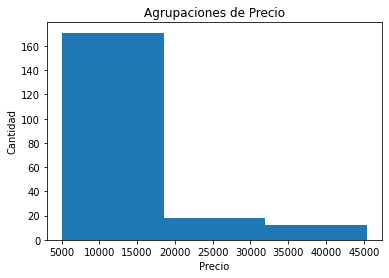

In [113]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["price"], bins = 3)

plt.pyplot.xlabel("Precio")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Agrupaciones de Precio")

Text(0.5, 1.0, 'Agrupaciones de Precio')

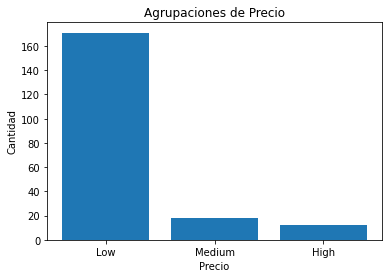

In [114]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["price-binned"].value_counts())

plt.pyplot.xlabel("Precio")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Agrupaciones de Precio")

---
##**Convertir variables categóricas en variables cuantitativas en Python**

La mayoría de los modelos estadísticos solo toman variables numéricas de entrada, por eso es necesario convertir las variables categóricas a variables numéricas.

En nuestro conjunto de datos de autos, la variable categórica *fuel-type* tiene dos valores: gas o diesel.

Para solucionar esto, se agregan dos nuevas variables correspondiente a los valores únicos dentro de la variable categórica, es decir, dos columnas llamadas gas y diesel. Así cuando el auto es de gas, la variable categórica de gas llevara el número 1, de lo contrario llevará un 0.

Esta técnica es llamada *one-hot encoding*

Para aplicar esta técnica en Python, se hace uso del método *get_dummies()* que convierte las variables categóricas a variables dummy.

In [115]:
pd.get_dummies(df["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


---
##**Lab 2**

Para evaluar los datos nulos en el conjunto de datos:

In [116]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,price-binned
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


A partir del dataframe creado anteriormente, se puede extraer un resumen del total de valores nulos en cada una de las variables:

In [117]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    205
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
False    205
Na

**Pregunta 1**

Reemplaza los valores nan en la columna stroke por su promedio.

In [118]:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_stroke, inplace=True)

**Pregunta 2**

En la columna *highway-mpg* convertir de mpg a L/100km y cambiar el nombre de la columna a *highway-L/100km.

In [119]:
df["highway-mpg"]=235/df["highway-mpg"]
df.rename(columns={"highway-mpg":"highway-L/100km"},inplace=True)

**Pregunta 3**

Normaliza la columna *height*.

In [120]:
df["height"]=df["height"]/df["height"].max()

**Pregunta 4**

Crear un indicador para la columna *aspiration*.

In [121]:
dummy2=pd.get_dummies(df["aspiration"])

**Pregunta 5**

Agrega el nuevo dataframe al original y elimina la columna *aspiration*.

In [122]:
df = pd.concat([df, dummy2], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,price-binned,std,turbo
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,11.190476,8.703704,13495.0,Low,1,0
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,11.190476,8.703704,16500.0,Low,1,0
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,12.368421,9.038462,16500.0,Low,1,0
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,9.791667,7.833333,13950.0,Low,1,0
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,13.055556,10.681818,17450.0,Low,1,0


---
##**Graded Review Questions**

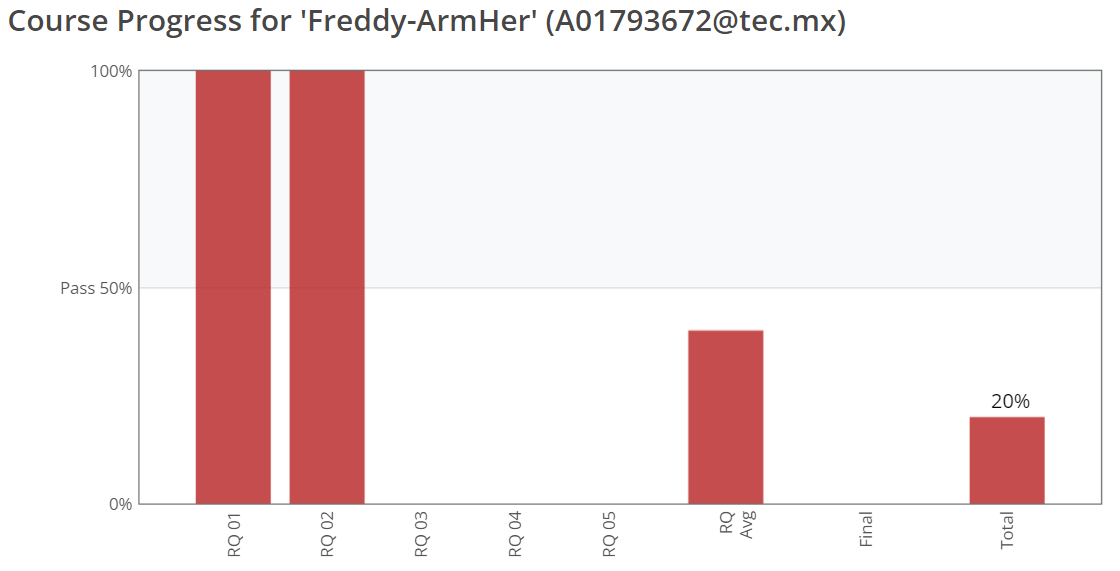